<a href="https://colab.research.google.com/github/shivanidhar29/projects/blob/main/Dupont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

myAPIKey = '79fc3166e685d1fce583c5a0a5c9b71b'

stock = 'CSCO'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()

incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()

In [ ]:
#four recent years
print(balanceStatements[:4])

[{'date': '2021-07-31', 'symbol': 'CSCO', 'reportedCurrency': 'USD', 'cik': '0000858877', 'fillingDate': '2021-09-09', 'acceptedDate': '2021-09-09 16:39:49', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 9175000000, 'shortTermInvestments': 15343000000, 'cashAndShortTermInvestments': 24518000000, 'netReceivables': 10146000000, 'inventory': 1559000000, 'otherCurrentAssets': 2889000000, 'totalCurrentAssets': 39112000000, 'propertyPlantEquipmentNet': 2338000000, 'goodwill': 38168000000, 'intangibleAssets': 3619000000, 'goodwillAndIntangibleAssets': 41787000000, 'longTermInvestments': 0.0, 'taxAssets': 4360000000, 'otherNonCurrentAssets': 9900000000, 'totalNonCurrentAssets': 58385000000, 'otherAssets': 0.0, 'totalAssets': 97497000000, 'accountPayables': 2362000000, 'shortTermDebt': 2508000000, 'taxPayables': 801000000, 'deferredRevenue': 12148000000, 'otherCurrentLiabilities': 9239000000, 'totalCurrentLiabilities': 26257000000, 'longTermDebt': 9018000000, 'deferredRevenu

In [ ]:

fourYearBalanceStatement = balanceStatements[:4]
fourYearIncomeStatement = incomeStatements[:4]

In [ ]:
#first fraction
profitability = []
#second fraction
assetTurnOver = []
#Third fraction
capitalStructure = []
returnOnEquity = []
dates=[]

# getting details

for i in range(0,4):
  dates.append(fourYearBalanceStatement[i]['date'])
  profitabilityValue = fourYearIncomeStatement[i]['netIncome']/fourYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)

  assetTurnOverValue = fourYearIncomeStatement[i]['revenue']/fourYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue = fourYearBalanceStatement[i]['totalAssets']/fourYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)

  returnOnEquityValue = profitabilityValue * assetTurnOverValue * capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [ ]:
print(returnOnEquity)

[0.2565960024227741, 0.29572784810126584, 0.3461618658961604, 0.0025460605499490786]


In [ ]:
# creating a dataframe
df = pd.DataFrame(columns = ['date','profitability','assetTurnOver','CapitalStructure','returnOnEquity'])
#df['year'] = pd. DatetimeIndex(df['date']). year.

df['profitability'] = profitability
df['assetTurnOver'] = assetTurnOver
df['CapitalStructure'] = capitalStructure

df['returnOnEquity'] = returnOnEquity
df['date'] = dates


print(df)

         date  profitability  assetTurnOver  CapitalStructure  returnOnEquity
0  2021-07-31       0.212594       0.510970          2.362132        0.256596
1  2020-07-25       0.227460       0.519762          2.501398        0.295728
2  2019-07-27       0.223894       0.530754          2.913020        0.346162
3  2018-07-28       0.002230       0.453467          2.517915        0.002546


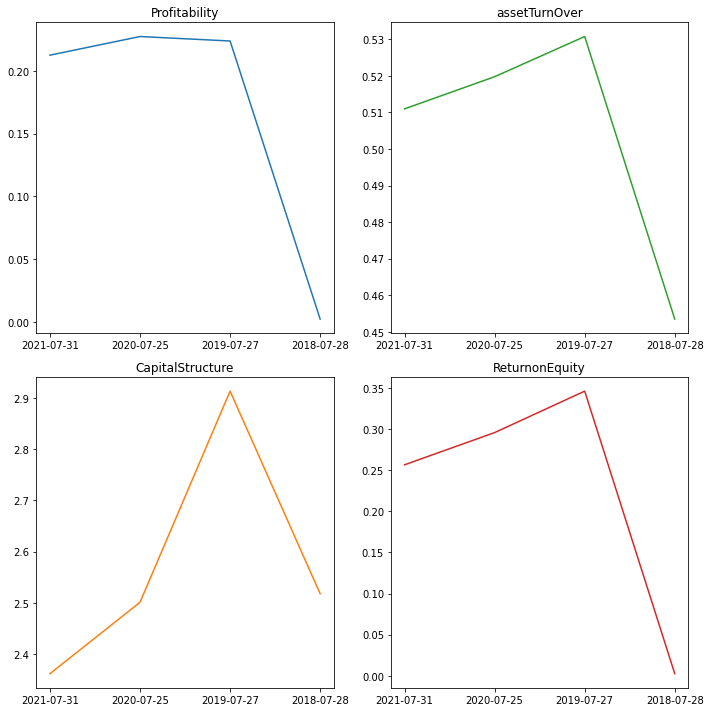

In [ ]:
from IPython.core.pylabtools import figsize
fig, axs = plt.subplots(2, 2,figsize=(10,10))
x = df['date']
axs[0, 0].plot(x, df['profitability'])
axs[0, 0].set_title('Profitability')
axs[0, 1].plot(x, df['assetTurnOver'],'tab:green')
axs[0, 1].set_title('assetTurnOver')
axs[1, 0].plot(x, df['CapitalStructure'],'tab:orange')
axs[1, 0].set_title('CapitalStructure')
axs[1, 1].plot(x, df['returnOnEquity'], 'tab:red')
axs[1, 1].set_title('ReturnonEquity')

fig.tight_layout()